## HD 2039

Radial velocity data for HD2039 were obtained from 
[Tinney et al.(2003)](./references.md).

Demonstration:
1. RadialVelocity Model
2. Circular Priors
3. NestedSampler
4. Evidence

Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import RadialVelocityModel
from BayesicFitting import PolynomialModel
from BayesicFitting import CircularUniformPrior
from BayesicFitting import StellarOrbitModel
from BayesicFitting import BasicSplinesModel
from BayesicFitting import Fitter

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt



In [2]:
#%matplotlib osx

Read the data

In [3]:
tbl = ascii.read( "data/HD2039-Tinney.dat" )
#print( tbl )
jd = tbl['JDa'].data
rv = tbl['RVa'].data
er = tbl['Uncertainty'].data
wgt = None
#wgt = 100.0 / numpy.square( er )
#print( wgt )

We define a radial velocity model. It has 5 parameters: eccentricity, amplitude, period, phase of periastron, longitude of periastron.
The phase parameters both get a CircularUniformPrior.
We need to add a constant for the systemic velocity of the system.

In [4]:
twopi = 2 * math.pi
rvm = RadialVelocityModel( )
lolim = [0.0, 0.0, 1000.0]
hilim = [0.9, 200.0, 1500.0]
rvm.setLimits( lowLimits=lolim, highLimits=hilim )
rvm.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl = pm + rvm
print( mdl )


Polynomial: f( x:p ) = p_0 +
RadialVelocity 


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity 
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine
>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>


>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>


>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>


>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>


Iteration   logZ        H     LowL     npar    parameters
   17939      -166.     17.9      -145.      7 
[    0.430    0.672  121.202 1221.207    5.335    5.827   13.508]
Engines              success     reject     failed       best      calls
GalileanEngine        105411      48305      63551          0      19465
ChordEngine           136282     245203          0          0      19465
Calls to LogL         598752   to dLogL      48305
Samples       18439
Evidence       -72.109 +-      0.082


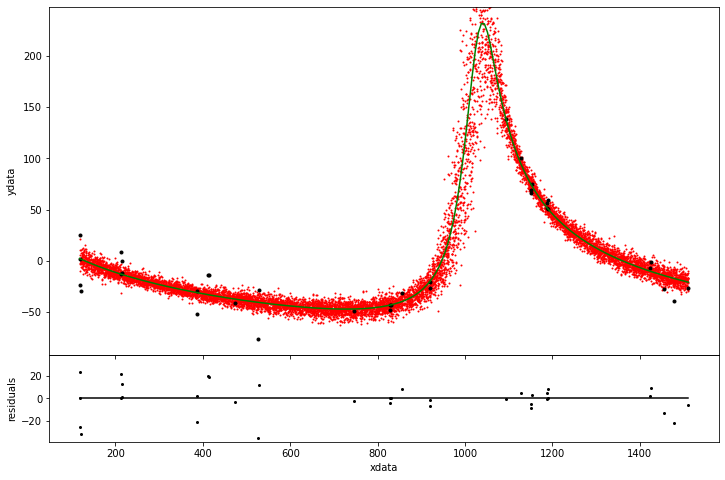

In [5]:
# define NestedSampler
ns = NestedSampler( jd, mdl, rv, weights=wgt, seed=1301 )
ns.ensemble = 500
# set limits on the noise scale of the distribution
ns.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi = ns.sample( plot=True )


In [6]:
sl = ns.samples
par = sl.parameters
std = sl.stdevs
print( "            offset   eccentr   amplit   period    phase    time ")
print( "params  ", fmt( par, max=None ) )
print( "stdevs  ", fmt( std, max=None ) )
pal = par.copy()
stl = std.copy()
pal[4] *= 180 / math.pi
pal[5] *= 0.5 * pal[2] / math.pi
stl[4] *= 180 / math.pi
stl[5] *= 0.5 * pal[2] / math.pi
print( "params  ", fmt( pal, max=None ) )
print( "stdevs  ", fmt( stl, max=None ) )
print( "scale   ", fmt( sl.scale ), " +-", fmt( sl.stdevScale ) )
print( "evidence", fmt( evi ) )

            offset   eccentr   amplit   period    phase    time 
params   [    4.346    0.716  149.165 1237.079    5.231    5.839]
stdevs   [    3.098    0.051   28.079   51.812    0.227    0.077]
params   [    4.346    0.716  149.165 1237.079  299.704  138.610]
stdevs   [    3.098    0.051   28.079   51.812   13.009    1.835]
scale       14.926  +-     1.986
evidence   -72.109


There were rumours that there could be 2 planets. We add another RadialVelocityModel and try again.

In [7]:
twopi = 2 * math.pi
rvm1 = RadialVelocityModel( )
lolim1 = [0.0, 0.0, 1000.0]
hilim1 = [0.9, 200.0, 1500.0]
rvm1.setLimits( lowLimits=lolim, highLimits=hilim )
rvm1.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm1.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
rvm2 = RadialVelocityModel( )
lolim2 = [0.0, 0.0, 10.0]
hilim2 = [0.9, 200.0, 1000.0]
rvm2.setLimits( lowLimits=lolim2, highLimits=hilim2 )
rvm2.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm2.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm2 )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl2 = pm + rvm1 + rvm2
print( mdl2 )



Polynomial: f( x:p ) = p_0 +
RadialVelocity  +
RadialVelocity 


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity  +
  RadialVelocity 
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine
>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>


>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>


>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>


>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>

>


>

>

>

>

>

>

>

>

>

>

>

>

>

>

>


Iteration   logZ        H     LowL     npar    parameters
   21429      -169.     21.4      -139.     12 
[    8.627    0.768  183.018 1246.324    5.175    5.889    0.687   14.780   20.228    6.142    2.770   12.199]
Engines              success     reject     failed       best      calls
GalileanEngine        124440      59440     104070          0      28415
ChordEngine           199147     718695         32          0      28415
Calls to LogL        1205824   to dLogL      59440
Samples       21929
Evidence       -73.463 +-      0.090


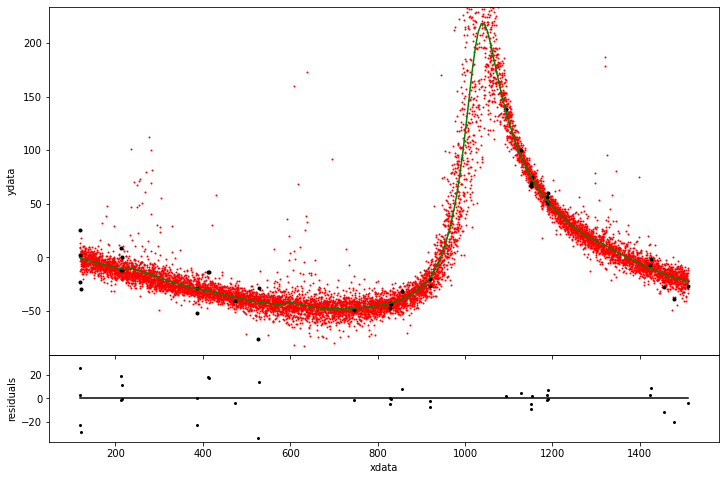

In [8]:
# define NestedSampler
ns1 = NestedSampler( jd, mdl2, rv, weights=wgt, seed=1301 )
ns1.ensemble = 500
# set limits on the noise scale of the distribution
ns1.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi1 = ns1.sample( plot=True )



In [9]:
pars2 = ns1.parameters
stdv2 = ns1.stdevs
print( fmt( par, max=None ) )
print( fmt( std, max=None ) )
print( fmt( pars2, max=None ) )
print( fmt( stdv2, max=None ) )

[    4.346    0.716  149.165 1237.079    5.231    5.839]
[    3.098    0.051   28.079   51.812    0.227    0.077]
[    3.988    0.711  141.686 1261.921    5.139    5.834    0.469   16.152  714.864    3.083    3.208]
[    3.240    0.069   32.797   60.874    0.265    0.110    0.310   23.280  279.522    1.801    2.014]


The evidence did not go up. So the 2 planet model is not better. 

We plot both models in one figure (green for 1 planet; red for 2). 
Obviously there is little in the data that supports 2 planets.

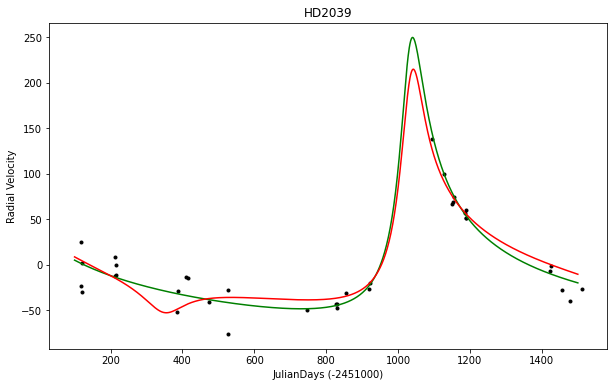

In [10]:
plt.figure( "HD2039-1", figsize=[10,6] )
plt.plot( jd, rv, 'k. ' )

xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, par ), 'g-' )
plt.plot( xx, mdl2.result( xx, ns1.parameters ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.savefig( "HD2039-1.png" )
#plt.show()

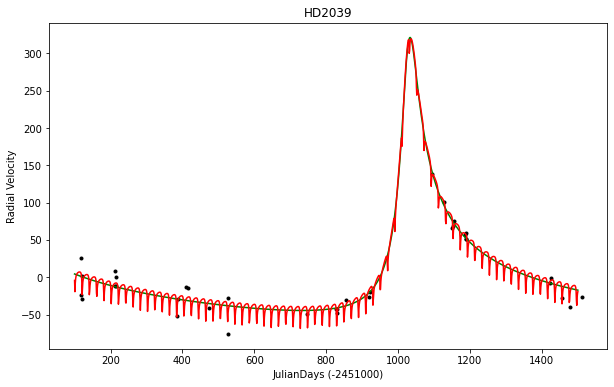

In [11]:
plt.figure( "HD2039-ml", figsize=[10,6] )
plt.plot( jd, rv, 'k. ' )

parml = ns1.samples[-1].parameters
xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, parml[:6] ), 'g-' )
plt.plot( xx, mdl2.result( xx, parml ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.savefig( "HD2039-ml.png" )
plt.show()

In [12]:
som = StellarOrbitModel()
k1 = [0,1,2,3,6]
sompar = som.parameters
sompar[k1] = pars2[1:6]

#print( sompar )
yy = som.result( xx, sompar )
xm1 = yy[:,0] * numpy.sin( yy[:,1] )
ym1 =-yy[:,0] * numpy.cos( yy[:,1] )

print( fmt( xm1, tail=4 ) )
print( fmt( ym1, tail=4 ) ) 

sompar[k1] = pars2[6:]

#print( sompar )
yy = som.result( xx, sompar )
xm2 = yy[:,0] * numpy.sin( yy[:,1] )
ym2 =-yy[:,0] * numpy.cos( yy[:,1] )

print( fmt( xm2, tail=4 ) )
print( fmt( ym2, tail=4 ) ) 



[  152.421  152.405  152.388  152.369  152.349 ...  140.257  140.103  139.948  139.792]
[  132.376  132.823  133.269  133.714  134.158 ...  182.848  183.149  183.448  183.747]
[    9.995   10.064   10.131   10.199   10.266 ...    7.619    7.695    7.771    7.847]
[  -19.787  -19.719  -19.651  -19.582  -19.512 ...  -21.681  -21.632  -21.583  -21.533]


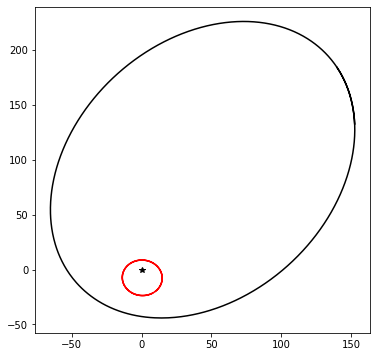

In [13]:
plt.figure( "orbit", figsize=[6,6] )

plt.plot( xm1, ym1, 'k-' )
plt.plot( xm2, ym2, 'r-' )
plt.plot( [0], [0], 'k*' )
plt.show()